<a href="https://colab.research.google.com/github/hieu-le-2412/ai-course/blob/master/Homework_3_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In this exercise, you will try to improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [0]:
import tensorflow as tf

# YOUR CODE STARTS HERE
from tensorflow import keras
from keras import Sequential
from keras.callbacks import Callback, ModelCheckpoint
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from matplotlib import pyplot as plt
from IPython.display import clear_output
import datetime
# YOUR CODE ENDS HERE


Using TensorFlow backend.


Load dataset

In [0]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# YOUR CODE STARTS HERE
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
# YOUR CODE ENDS HERE

In [0]:

class EarlyStopping(Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []
    self.fig = plt.figure()
    self.logs = []
  
  def on_train_batch_begin(self, batch, logs=None):
    print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_train_batch_end(self, batch, logs=None):
    print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_begin(self, batch, logs=None):
    print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_end(self, batch, logs=None):
    print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))
  
  def on_epoch_end(self, epoch, logs={}):
    # YOUR CODE HERE
    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1
    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True
      
early_stopping = EarlyStopping()

In [0]:
model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),  
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    # YOUR CODE ENDS HERE
])


Instructions for updating:
Colocations handled automatically by placer.


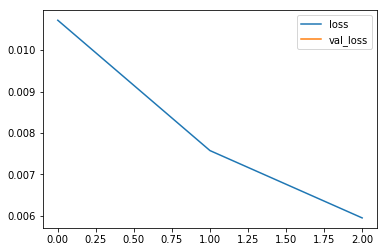


Reached 99.8% accuracy so cancelling training!
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0541 - acc: 0.9877


In [0]:

# YOUR CODE STARTS HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=20, callbacks=[early_stopping])
test_loss = model.evaluate(test_images, test_labels)
# YOUR CODE ENDS HERE

